In [13]:
import sys
import os
import locale
import glob
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline

import arrow
import analytics_tools

module_path = os.path.abspath(os.path.join('../../tools'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [14]:
midpoint = lambda x: (np.max(x)+ np.min(x))/2
log_midpoint = lambda x: np.power(10,((np.log10(np.max(x))+np.log10(np.min(x)))/2))

def read_files_to_df(directory, cols, start_date=None):
    """Lee CSVs de misma estructura en un directorio a un solo DataFrame."""
    
    start_date = start_date or arrow.now().shift(months=-3).format("YYYY-MM-DD")
    file_pattern = os.path.join(directory, "*.csv") 
    filtered_files = [
        file for file in glob.glob(file_pattern) 
        if arrow.get(file.split("_")[1].split(".")[0]) > arrow.get(start_date)
    ]

    dfs = [pd.read_csv(file, usecols = cols, encoding="utf8", parse_dates=True)
           for file in filtered_files]
        
    return pd.concat(dfs, axis=0)

In [74]:
# filtro las columnas no usadas. (al 2019-08-08 hay 240MB de diferencia)
curated_fields = ['id', 'ip_address', 'host', 'uri', 'querystring', 'start_time',
      'status_code', 'user_agent',
       'x_source', "referer"]

In [75]:
analytics_tools.update_analytics()

In [78]:

# Cargo csv's
# df_analytics = read_files_to_df('/home/melik/sdt-analytics-download/')
df_analytics = read_files_to_df(analytics_tools.DIR_DATA_SDT, None, start_date="2019-07-01")

/Users/abenassi/anaconda/envs/analytics/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [79]:
df_analytics

,api_data,host,id,ip_address,querystring,referer,request_method,request_time,start_time,status_code,token,uri,user_agent,x_source
0,series-tiempo-prod,apis.datos.gob.ar,16273203,168.101.25.104,ids=3.2_OGP_D_2004_T_17&limit=1000&sort=desc,NaN,GET,0.444,2019-07-29 03:00:02+00:00,200,NaN,/series/api/series/,Python-urllib/2.7,NaN
1,series-tiempo-prod,apis.datos.gob.ar,16273202,168.101.25.104,ids=143.3_ICE_SER_VM_2004_A_34&limit=1000&sort...,NaN,GET,0.471,2019-07-29 03:00:02+00:00,200,NaN,/series/api/series/,Python-urllib/2.7,NaN
2,series-tiempo-prod,apis.datos.gob.ar,16273206,168.101.25.104,ids=143.3_NO_PR_2004_A_31&limit=1000&sort=desc,NaN,GET,0.470,2019-07-29 03:00:03+00:00,200,NaN,/series/api/series/,Python-urllib/2.7,NaN
3,series-tiempo-prod,apis.datos.gob.ar,16273204,168.101.25.104,ids=3.2_DGCP_D_2004_T_30&limit=1000&sort=desc,NaN,GET,0.476,2019-07-29 03:00:03+00:00,200,NaN,/series/api/series/,Python-urllib/2.7,NaN
4,series-tiempo-prod,apis.datos.gob.ar,16273208,168.101.25.104,ids=14.2_E_M_2004_0_3&limit=1000&sort=desc,NaN,GET,0.457,2019-07-29 03:00:04+00:00,200,NaN,/series/api/series/,Python-urllib/2.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14456,series-tiempo-prod,apis.datos.gob.ar,21223288,190.15.220.215,ids=45.2_ECTDT_0_T_33&limit=1000&sort=desc,https://www.minhacienda.gob.ar/series-tiempo-a...,GET,0.694,2019-10-15 02:59:52+00:00,200,NaN,/series/api/series/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN
14457,series-tiempo-prod,apis.datos.gob.ar,21223287,190.15.220.215,ids=131.1_FET_0_0_12&limit=1000&sort=desc,https://www.minhacienda.gob.ar/series-tiempo-a...,GET,0.403,2019-10-15 02:59:52+00:00,200,NaN,/series/api/series/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN
14458,series-tiempo-prod,apis.datos.gob.ar,21223286,190.15.220.215,ids=74.3_ISC_0_M_19&limit=1000&sort=desc,https://www.minhacienda.gob.ar/series-tiempo-a...,GET,0.374,2019-10-15 02:59:52+00:00,200,NaN,/series/api/series/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN
14459,series-tiempo-prod,apis.datos.gob.ar,21223285,190.15.220.215,ids=143.3_ICE_SER_VM_2004_A_34&limit=1000&sort...,https://www.minhacienda.gob.ar/series-tiempo-a...,GET,0.390,2019-10-15 02:59:52+00:00,200,NaN,/series/api/series/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN


In [80]:
serie_tc = "168.1_T_CAMBIOR_D_0_0_26"

In [81]:
len(df_analytics[
    (pd.notnull(df_analytics.querystring)) &
    (df_analytics.querystring.str.contains(serie_tc))
])

80757

In [82]:
df_tc = df_analytics[
    (pd.notnull(df_analytics.querystring)) &
    (df_analytics.querystring.str.contains(serie_tc))
]

In [83]:
df_tc["start_time"] = pd.to_datetime(df_tc.start_time)

/Users/abenassi/anaconda/envs/analytics/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
df_tc["day"] = df_tc.start_time.dt.date

/Users/abenassi/anaconda/envs/analytics/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
serie_tc_hits = df_tc.groupby("day").count()["id"]

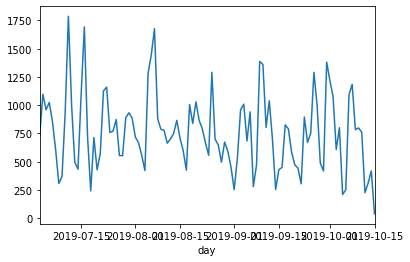

In [86]:
serie_tc_hits.plot()

In [25]:
google_trends_dolar_url = "https://trends.google.com/trends/api/widgetdata/multiline/csv?req=%7B%22time%22%3A%222019-08-01%202019-10-15%22%2C%22resolution%22%3A%22DAY%22%2C%22locale%22%3A%22es%22%2C%22comparisonItem%22%3A%5B%7B%22geo%22%3A%7B%22country%22%3A%22AR%22%7D%2C%22complexKeywordsRestriction%22%3A%7B%22keyword%22%3A%5B%7B%22type%22%3A%22BROAD%22%2C%22value%22%3A%22dolar%22%7D%5D%7D%7D%5D%2C%22requestOptions%22%3A%7B%22property%22%3A%22%22%2C%22backend%22%3A%22IZG%22%2C%22category%22%3A0%7D%7D&token=APP6_UEAAAAAXadD6RXy9iXijA9MYOZccTOXEy3wP3iq&tz=180"

In [26]:
df_google_trend = pd.read_csv(google_trends_dolar_url)

In [27]:
df_google_trend

,Category: All categories
Day,dolar: (Argentina)
2019-08-01,10
2019-08-02,10
2019-08-03,5
2019-08-04,4
...,...
2019-10-08,9
2019-10-09,7
2019-10-10,8
2019-10-11,8


In [28]:
df_google_trend["Category: All categories"].index

Index(['Day', '2019-08-01', '2019-08-02', '2019-08-03', '2019-08-04',
       '2019-08-05', '2019-08-06', '2019-08-07', '2019-08-08', '2019-08-09',
       '2019-08-10', '2019-08-11', '2019-08-12', '2019-08-13', '2019-08-14',
       '2019-08-15', '2019-08-16', '2019-08-17', '2019-08-18', '2019-08-19',
       '2019-08-20', '2019-08-21', '2019-08-22', '2019-08-23', '2019-08-24',
       '2019-08-25', '2019-08-26', '2019-08-27', '2019-08-28', '2019-08-29',
       '2019-08-30', '2019-08-31', '2019-09-01', '2019-09-02', '2019-09-03',
       '2019-09-04', '2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08',
       '2019-09-09', '2019-09-10', '2019-09-11', '2019-09-12', '2019-09-13',
       '2019-09-14', '2019-09-15', '2019-09-16', '2019-09-17', '2019-09-18',
       '2019-09-19', '2019-09-20', '2019-09-21', '2019-09-22', '2019-09-23',
       '2019-09-24', '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
       '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02', '2019-10-03',
      

In [29]:
df_api_serie = serie_tc_hits.to_frame()
df_api_serie.index = pd.to_datetime(df_api_serie.index)
df_api_serie.index

DatetimeIndex(['2019-07-02', '2019-07-03', '2019-07-04', '2019-07-05',
               '2019-07-06', '2019-07-07', '2019-07-08', '2019-07-09',
               '2019-07-10', '2019-07-11',
               ...
               '2019-10-06', '2019-10-07', '2019-10-08', '2019-10-09',
               '2019-10-10', '2019-10-11', '2019-10-12', '2019-10-13',
               '2019-10-14', '2019-10-15'],
              dtype='datetime64[ns]', name='day', length=106, freq=None)

In [30]:
df_google_serie = df_google_trend["Category: All categories"].to_frame()
df_google_serie = df_google_serie[df_google_serie.index != "Day"]
df_google_serie.index = pd.to_datetime(df_google_serie.index)
df_google_serie["Category: All categories"] = df_google_serie["Category: All categories"].astype(int)
df_google_serie.index

DatetimeIndex(['2019-08-01', '2019-08-02', '2019-08-03', '2019-08-04',
               '2019-08-05', '2019-08-06', '2019-08-07', '2019-08-08',
               '2019-08-09', '2019-08-10', '2019-08-11', '2019-08-12',
               '2019-08-13', '2019-08-14', '2019-08-15', '2019-08-16',
               '2019-08-17', '2019-08-18', '2019-08-19', '2019-08-20',
               '2019-08-21', '2019-08-22', '2019-08-23', '2019-08-24',
               '2019-08-25', '2019-08-26', '2019-08-27', '2019-08-28',
               '2019-08-29', '2019-08-30', '2019-08-31', '2019-09-01',
               '2019-09-02', '2019-09-03', '2019-09-04', '2019-09-05',
               '2019-09-06', '2019-09-07', '2019-09-08', '2019-09-09',
               '2019-09-10', '2019-09-11', '2019-09-12', '2019-09-13',
               '2019-09-14', '2019-09-15', '2019-09-16', '2019-09-17',
               '2019-09-18', '2019-09-19', '2019-09-20', '2019-09-21',
               '2019-09-22', '2019-09-23', '2019-09-24', '2019-09-25',
      

In [32]:
df_merged = df_api_serie.merge(df_google_serie, how="inner", right_index=True, left_index=True)
df_merged

,id,Category: All categories
2019-08-01,718,10
2019-08-02,667,10
2019-08-03,556,5
2019-08-04,422,4
2019-08-05,1282,13
...,...,...
2019-10-08,1185,9
2019-10-09,784,7
2019-10-10,799,8
2019-10-11,760,8


In [45]:
df_merged["id_normalizado"] =  (df_merged["id"] / df_merged["id"].max())*100

In [69]:
df_merged.head(20)

,id,Category: All categories,id_normalizado
2019-08-01,718,10,42.814550
2019-08-02,667,10,39.773405
2019-08-03,556,5,33.154442
2019-08-04,422,4,25.163983
2019-08-05,1282,13,76.446035
2019-08-06,1447,12,86.285033
2019-08-07,1677,11,100.000000
2019-08-08,881,10,52.534287
2019-08-09,787,10,46.929040
2019-08-10,778,5,46.392367


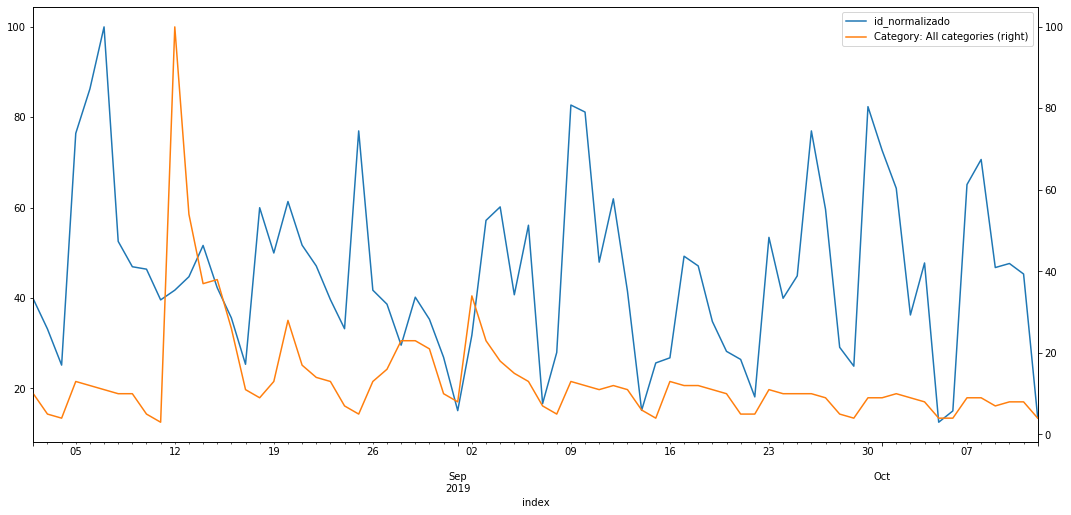

In [67]:
date_filter = "2019-08-01"

ax = df_merged[df_merged.index > date_filter].reset_index().plot("index",'id_normalizado')
df_merged[df_merged.index > date_filter].reset_index().plot("index", 'Category: All categories', secondary_y=True, ax=ax, figsize=(18,8))

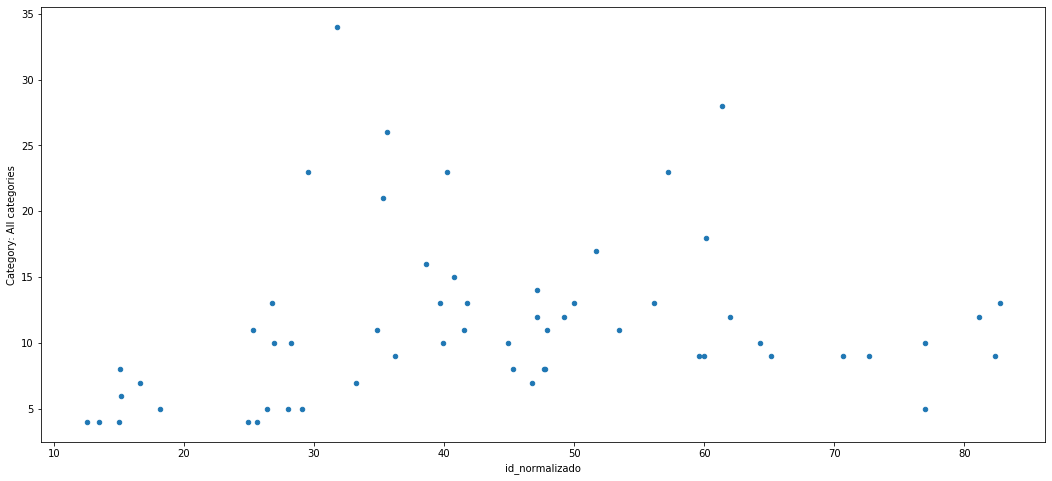

In [53]:
df_merged[df_merged.index > date_filter].plot.scatter("id_normalizado", "Category: All categories", figsize=(18,8))

In [66]:
df_merged[df_merged.index > date_filter].corr()

,id,Category: All categories,id_normalizado
id,1.000000,0.176879,1.000000
Category: All categories,0.176879,1.000000,0.176879
id_normalizado,1.000000,0.176879,1.000000


In [64]:
df_analytics[df_analytics.uri == "/series/api/search/"].apply(lambda x: x["querystring"].split("&q=")[1] if "&q=" in x else None, axis=1)

575      None
4646     None
4648     None
4649     None
4650     None
         ... 
14007    None
14008    None
14011    None
14128    None
14429    None
Length: 37953, dtype: object

In [93]:
df_tc[df_tc.day == pd.to_datetime("2019-08-07")].head()

,api_data,host,id,ip_address,querystring,referer,request_method,request_time,start_time,status_code,token,uri,user_agent,x_source,day
21202,series-tiempo-prod,apis.datos.gob.ar,16636795,201.250.42.228,ids=168.1_T_CAMBIOR_D_0_0_26&metadata=full&las...,NaN,GET,0.923,2019-08-07 00:05:14+00:00,200,NaN,/series/api/series/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,series-tiempo-explorer,2019-08-07
21303,series-tiempo-prod,apis.datos.gob.ar,16636936,8.5.253.154,ids=168.1_T_CAMBIOR_D_0_0_26&metadata=full&las...,NaN,GET,0.001,2019-08-07 00:16:16+00:00,200,NaN,/series/api/series/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,series-tiempo-explorer,2019-08-07
21324,series-tiempo-prod,apis.datos.gob.ar,16636990,66.249.88.17,ids=168.1_T_CAMBIOR_D_0_0_26&metadata=full&las...,NaN,GET,0.002,2019-08-07 00:20:00+00:00,200,NaN,/series/api/series/,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,series-tiempo-explorer,2019-08-07
21329,series-tiempo-prod,apis.datos.gob.ar,16636984,66.249.83.12,ids=168.1_T_CAMBIOR_D_0_0_26&metadata=full&las...,NaN,GET,0.002,2019-08-07 00:20:00+00:00,200,NaN,/series/api/series/,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,series-tiempo-explorer,2019-08-07
21402,series-tiempo-prod,apis.datos.gob.ar,16637084,181.230.132.67,ids=168.1_T_CAMBIOR_D_0_0_26&metadata=full&las...,NaN,GET,0.002,2019-08-07 00:30:32+00:00,200,NaN,/series/api/series/,Mozilla/5.0 (iPhone; CPU iPhone OS 12_3_1 like...,series-tiempo-explorer,2019-08-07


In [95]:
len(df_tc[df_tc.day == pd.to_datetime("2019-08-07")])

1677

In [94]:
df_tc[df_tc.day == pd.to_datetime("2019-08-07")].x_source.value_counts()

series-tiempo-explorer    240
ts-components              15
ts-components-card          1
Name: x_source, dtype: int64

In [100]:
df_tc[df_tc.day == pd.to_datetime("2019-08-07")].user_agent.value_counts().head(20)

Mozilla/5.0 (compatible; Google-Apps-Script)                                                                                                                        1069
Mozilla/5.0 (compatible; GoogleDocs; apps-spreadsheets; +http://docs.google.com)                                                                                     328
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36                                                   66
Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36                                                    20
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36                                             17
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.87 Safari/537.36                                                   